In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv
/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.200d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.50d.txt
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.300d.txt
/kaggle/input/nlpword2vecembeddingspretrained/GoogleNews-vectors-negative300.bin
/kaggle/input/nlpword2vecembeddingspretrained/glove.6B.100d.txt
/kaggle/input/fasttext/wiki.simple.vec


In [2]:
# Data import and transformation

movies = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies = movies.merge(credits,on='title')


movies_feature_set = movies[['id','title','keywords','genres','cast','popularity','vote_average','vote_count']]
movies_feature_set.dropna(inplace=True)
movies_feature_set.head()



/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,title,keywords,genres,cast,popularity,vote_average,vote_count
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,6.9,4500
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,6.3,4466
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",112.312950,7.6,9106
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",43.926995,6.1,2124


In [3]:
movies_feature_set['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

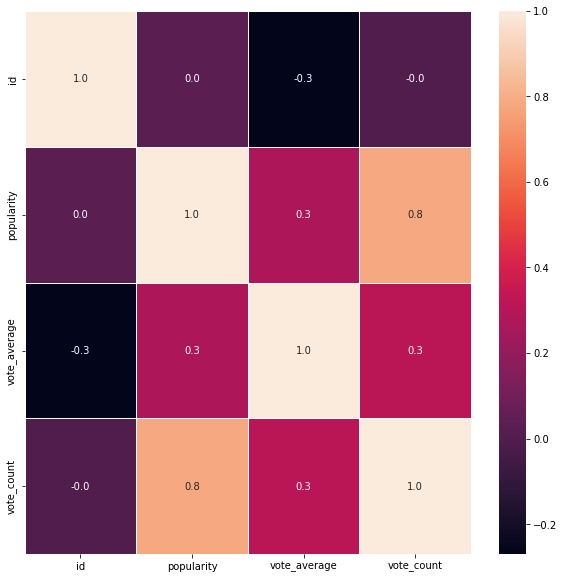

In [4]:
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(movies_feature_set.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.show()

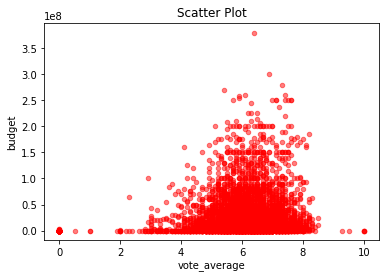

In [5]:
movies.plot(kind='scatter', x='vote_average', y='budget', alpha=.5, color='r')
plt.xlabel('vote_average')
plt.ylabel('budget')
plt.title('Scatter Plot')
plt.show()

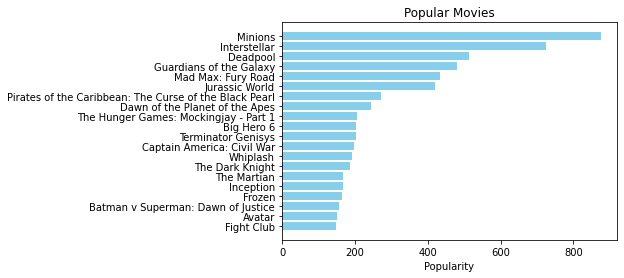

In [6]:
sorted_movies = movies_feature_set.sort_values('popularity' , ascending=False)
sorted_movies.head(3)

def horizontal_bar():
  plt.title("Movie With Popularity")
  plt.barh(sorted_movies['title'].head(20),sorted_movies['popularity'].head(20), align='center',
          color='skyblue')
  plt.gca().invert_yaxis()
  plt.xlabel("Popularity",fontsize=10)
  plt.title("Popular Movies")
    
horizontal_bar()

In [7]:


def convert(text):
    arr = []
    for i in ast.literal_eval(text):
        arr.append(i['name'])
    
    return arr

movies_feature_set['genres'] = movies['genres'].apply(convert)


def convert_keyword_top3(text):
    arr= []
    count = 0
    for i in ast.literal_eval(text):
        if count<3:
            arr.append(i['name'])
            count+=1
    return arr   

movies_feature_set['keywords'] = movies['keywords'].apply(convert_keyword_top3)

def convert_cast_top2(text):
    arr= []
    count = 0
    for i in ast.literal_eval(text):
        if count<2:
            arr.append(i['name'])
            count+=1
    return arr        
movies_feature_set['cast'] = movies['cast'].apply(convert_cast_top2)
movies_feature_set['tags'] = movies_feature_set['keywords'] + movies_feature_set['genres'] + movies_feature_set['cast']
new_df = movies_feature_set[['id','title','tags']]
new_df.head(5)




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,id,title,tags
0,19995,Avatar,"[culture clash, future, space war, Action, Adv..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, Adventure, ..."
2,206647,Spectre,"[spy, based on novel, secret agent, Action, Ad..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, Action, ..."
4,49529,John Carter,"[based on novel, mars, medallion, Action, Adve..."


In [8]:
# Convert to tags to string format

new_df['tags'] = movies_feature_set['tags'].apply(lambda x: " ".join(x))
new_df.head(3)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,title,tags
0,19995,Avatar,culture clash future space war Action Adventur...
1,285,Pirates of the Caribbean: At World's End,ocean drug abuse exotic island Adventure Fanta...
2,206647,Spectre,spy based on novel secret agent Action Adventu...


In [9]:
new_df['tags'][0]

'culture clash future space war Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana'

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# remove commmon stop words from tags column 
tfidf = TfidfVectorizer(stop_words='english')
new_df['overview'] = new_df['tags'].fillna('')
tfidf_matrix = tfidf.fit_transform(new_df['tags'])

tfidf_matrix.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(4809, 7526)

In [11]:
from sklearn.metrics.pairwise import linear_kernel

# cosine similarity for matrix factorization 
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(new_df.index, index=new_df['title']).drop_duplicates()

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4804
Newlyweds                                   4805
Signed, Sealed, Delivered                   4806
Shanghai Calling                            4807
My Date with Drew                           4808
Length: 4809, dtype: int64

In [12]:
# Function that takes in movie title as input and outputs most similar movies
def movie_recommendations(title, cosine_sim=cosine_sim):
    
    idx = indices[title]

    # pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting of movies based on similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return new_df['title'].iloc[movie_indices]




In [13]:
movie_recommendations('Superman Returns')

870                          Superman II
813                             Superman
14                          Man of Steel
1299                        Superman III
2439    Superman IV: The Quest for Peace
2270            Dylan Dog: Dead of Night
41                         Green Lantern
1364                              Batman
72                         Suicide Squad
1365                              Batman
Name: title, dtype: object

Movie Genre Prediction Using Natural Language Processing (NLP)

In [14]:
movies_v2 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits_v2 = pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
movies_v2 = movies_v2.merge(credits_v2,on='title')


movies_clean = movies_v2[['title','keywords','cast','popularity','overview','genres']]
movies_clean.dropna(inplace=True)
movies_clean.head(5)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,title,keywords,cast,popularity,overview,genres
0,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",150.437577,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",139.082615,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",107.376788,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",112.312950,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",43.926995,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


In [15]:
movies_clean.dtypes

title          object
keywords       object
cast           object
popularity    float64
overview       object
genres         object
dtype: object

In [16]:
def convert(text):
    arr = []
    count = 0
    for i in ast.literal_eval(text):
         if count<1:
            arr.append(i['name'])
            count+=1
    return arr

movies_clean['genres'] = movies_v2['genres'].apply(convert)

movies_clean['genres'] = movies_clean['genres'].apply(lambda x: " ".join(x))


movies_summary = movies_clean[['title','overview','genres']]
movies_summary = movies_summary.dropna(subset=['title','overview','genres'])

movies_summary.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...",Action
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Adventure
2,Spectre,A cryptic message from Bond’s past sends him o...,Action
3,The Dark Knight Rises,Following the death of District Attorney Harve...,Action
4,John Carter,"John Carter is a war-weary, former military ca...",Action


In [17]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [18]:

movies_summary['clean_tag'] = movies_summary['overview'].apply(lambda x: clean_text(x))

In [19]:


movies_summary_clean = movies_summary[['title','clean_tag','genres']]
movies_summary_clean.head()



,title,clean_tag,genres
0,Avatar,in the nd century a paraplegic marine is dispa...,Action
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,Adventure
2,Spectre,a cryptic message from bond s past sends him o...,Action
3,The Dark Knight Rises,following the death of district attorney harve...,Action
4,John Carter,john carter is a war weary former military cap...,Action


In [20]:
movies_summary_clean.dtypes

title        object
clean_tag    object
genres       object
dtype: object

In [21]:

movies_summary_clean['genres'].value_counts()[:10].index.tolist()

['Drama',
 'Comedy',
 'Action',
 'Adventure',
 'Horror',
 'Crime',
 'Thriller',
 'Animation',
 'Fantasy',
 'Romance']

In [22]:
movies_summary_clean['genres'].value_counts()

Drama              1208
Comedy             1042
Action              755
Adventure           339
Horror              301
Crime               195
Thriller            194
Animation           123
Fantasy             118
Romance             106
Science Fiction      96
Documentary          87
Family               57
Mystery              41
Music                34
                     28
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Movie Genre Count Plot')

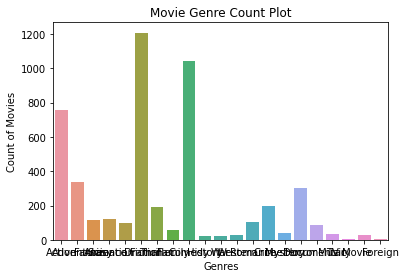

In [23]:
sns.countplot(movies_summary_clean['genres'])
plt.xlabel("Genres")
plt.ylabel("Count of Movies")
plt.title("Movie Genre Count Plot")

In [24]:
for i in movies_summary_clean.columns:
    #prinfting unique values
    print(i ,':', len(movies_summary_clean[i].unique()))

title : 4797
clean_tag : 4800
genres : 21


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(movies_summary_clean['clean_tag'],movies_summary_clean['genres'],test_size=0.2,shuffle=True)


In [26]:
#Tf-Idf

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

X_train_vectors_tfidf.shape

(3844, 19318)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score



#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  


#Predict y value for test dataset
y_predict_tfidf = nb_tfidf.predict(X_test_vectors_tfidf)


 

In [28]:
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_predict_tfidf))
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict_tfidf)

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         6
         Action       0.55      0.14      0.22       151
      Adventure       0.00      0.00      0.00        72
      Animation       0.00      0.00      0.00        39
         Comedy       0.45      0.60      0.52       187
          Crime       0.00      0.00      0.00        34
    Documentary       0.00      0.00      0.00        18
          Drama       0.32      0.88      0.47       245
         Family       0.00      0.00      0.00        13
        Fantasy       0.00      0.00      0.00        30
        History       0.00      0.00      0.00         6
         Horror       0.00      0.00      0.00        58
          Music       0.00      0.00      0.00         8
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        22
Science Fiction       0.00      0.00      0.00        15
       Thriller       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.36382536382536385

Naive Bayes Model Accuracy Score: 32.43%

In [29]:
# Model Testing: Logistic Regression

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)

print(classification_report(y_test,y_predict))
accuracy_score(y_test,y_predict)

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         6
         Action       0.41      0.60      0.49       151
      Adventure       0.36      0.17      0.23        72
      Animation       0.60      0.08      0.14        39
         Comedy       0.42      0.66      0.52       187
          Crime       0.50      0.06      0.11        34
    Documentary       0.33      0.06      0.10        18
          Drama       0.46      0.66      0.54       245
         Family       0.00      0.00      0.00        13
        Fantasy       0.00      0.00      0.00        30
        History       0.00      0.00      0.00         6
         Horror       0.55      0.38      0.45        58
          Music       0.00      0.00      0.00         8
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        22
Science Fiction       0.40      0.13      0.20        15
       Thriller       0.50    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4365904365904366

Logistic Regression Model Accuracy Score: 40.23%

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion = "gini", min_samples_split = 5, random_state = 5)

clf.fit(X_train_vectors_tfidf, y_train)

RandomForestClassifier(min_samples_split=5, random_state=5)

In [31]:
# Model Testing: Random Forest

y_pred = clf.predict(X_test_vectors_tfidf)
print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

                 precision    recall  f1-score   support

                      0.00      0.00      0.00         6
         Action       0.43      0.38      0.41       151
      Adventure       0.00      0.00      0.00        72
      Animation       0.00      0.00      0.00        39
         Comedy       0.32      0.50      0.39       187
          Crime       0.00      0.00      0.00        34
    Documentary       1.00      0.11      0.20        18
          Drama       0.35      0.75      0.47       245
         Family       0.00      0.00      0.00        13
        Fantasy       0.00      0.00      0.00        30
        History       0.00      0.00      0.00         6
         Horror       1.00      0.03      0.07        58
          Music       0.00      0.00      0.00         8
        Mystery       0.00      0.00      0.00         8
        Romance       0.00      0.00      0.00        22
Science Fiction       0.00      0.00      0.00        15
       Thriller       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3523908523908524

Random Forest Classifier Model Accuracy Score: 33.16%

## Static Embeddings for Multi-Label Text Classification 

In [32]:
def convert_1(text):
    arr = []
    for i in ast.literal_eval(text):
            arr.append(i['name'])
    return arr

movies_clean['genres'] = movies_v2['genres'].apply(convert_1)

movies_clean['genres'] = movies_clean['genres'].apply(lambda x: ", ".join(x))


movies_summary = movies_clean[['title','overview','genres']]
movies_summary = movies_summary.dropna(subset=['title','overview','genres'])

movies_summary.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


,title,overview,genres
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","Adventure, Fantasy, Action"
2,Spectre,A cryptic message from Bond’s past sends him o...,"Action, Adventure, Crime"
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"Action, Crime, Drama, Thriller"
4,John Carter,"John Carter is a war-weary, former military ca...","Action, Adventure, Science Fiction"


In [33]:
import re
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

movies_summary['clean_tag'] = movies_summary['overview'].apply(lambda x: clean_text(x))



movies_summary_clean_1 = movies_summary[['title','clean_tag','genres']]

movies_summary_clean_1.head(10)

,title,clean_tag,genres
0,Avatar,in the nd century a paraplegic marine is dispa...,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,"Adventure, Fantasy, Action"
2,Spectre,a cryptic message from bond s past sends him o...,"Action, Adventure, Crime"
3,The Dark Knight Rises,following the death of district attorney harve...,"Action, Crime, Drama, Thriller"
4,John Carter,john carter is a war weary former military cap...,"Action, Adventure, Science Fiction"
5,Spider-Man 3,the seemingly invincible spider man goes up ag...,"Fantasy, Action, Adventure"
6,Tangled,when the kingdoms most wanted and most charmin...,"Animation, Family"
7,Avengers: Age of Ultron,when tony stark tries to jumpstart a dormant p...,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,as harry begins his sixth year at hogwarts he ...,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,fearing the actions of a god like super hero l...,"Action, Adventure, Fantasy"


In [34]:
movies_summary_clean_1['genres'][0]

'Action, Adventure, Fantasy, Science Fiction'

In [35]:
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)

movies_summary_clean_1['genres']=movies_summary_clean_1['genres'].apply(remove_spaces)
movies_summary_clean_1['genres']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


0       Action,Adventure,Fantasy,Science Fiction
1                       Adventure,Fantasy,Action
2                         Action,Adventure,Crime
3                    Action,Crime,Drama,Thriller
4               Action,Adventure,Science Fiction
                          ...                   
4804                       Action,Crime,Thriller
4805                              Comedy,Romance
4806               Comedy,Drama,Romance,TV Movie
4807                                            
4808                                 Documentary
Name: genres, Length: 4806, dtype: object

In [36]:
movies_summary_clean_1

,title,clean_tag,genres
0,Avatar,in the nd century a paraplegic marine is dispa...,"Action,Adventure,Fantasy,Science Fiction"
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,"Adventure,Fantasy,Action"
2,Spectre,a cryptic message from bond s past sends him o...,"Action,Adventure,Crime"
3,The Dark Knight Rises,following the death of district attorney harve...,"Action,Crime,Drama,Thriller"
4,John Carter,john carter is a war weary former military cap...,"Action,Adventure,Science Fiction"
...,...,...,...
4804,El Mariachi,el mariachi just wants to play his guitar and ...,"Action,Crime,Thriller"
4805,Newlyweds,a newlywed couples honeymoon is upended by the...,"Comedy,Romance"
4806,"Signed, Sealed, Delivered",signed sealed delivered introduces a dedicated...,"Comedy,Drama,Romance,TV Movie"
4807,Shanghai Calling,when ambitious new york attorney sam is sent t...,


In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movies_summary_clean_1)

from sklearn.feature_extraction.text import CountVectorizer

In [38]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","), binary='true')
y_train = vectorizer.fit_transform(train['genres']).toarray()
y_test = vectorizer.transform(test['genres']).toarray()
print(y_train)

y_train[0]

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:

vectorizer.inverse_transform(y_train[[0]])

[array(['comedy', 'music'], dtype='<U15')]

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten

In [41]:
max_features = 20000 # this is the number of words we care about


vect=Tokenizer(num_words=max_features, split=' ', oov_token='<unw>', filters=' ')
vect.fit_on_texts(train['clean_tag'])
vocab_size = len(vect.word_index) + 1
print(vocab_size)

18664


In [42]:
#encoded_docs_train = vect.texts_to_sequences(train['clean_tag'])



In [43]:
#train['l'] = train['clean_tag'].apply(lambda x: len(str(x).split(' ')))

#train['clean_tag'][0]
#print("max length of sentence: " + str(train.clean_tag.max()))

In [44]:
encoded_docs_train = vect.texts_to_sequences(train['clean_tag'])
max_length = vocab_size




In [45]:

padded_docs_train = pad_sequences(encoded_docs_train, maxlen=175, padding='post')
print(padded_docs_train)

[[  32 2891  117 ...    0    0    0]
 [   3 2894 2895 ...    0    0    0]
 [ 239   66  304 ...    0    0    0]
 ...
 [   3  226    6 ...    0    0    0]
 [3125  912  567 ...    0    0    0]
 [   3   42    5 ...    0    0    0]]


In [46]:
encoded_docs_test =  vect.texts_to_sequences(test['clean_tag'])
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=175, padding='post')

Manuel Embedding config


In [47]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]



2022-09-09 05:04:43.497931: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [48]:


model_new = keras.Sequential()
# Configuring the parameters
model_new.add(layers.Embedding(input_dim = vocab_size, output_dim=50, input_length=175))
model_new.add(layers.LSTM(128)) 
model_new.add(layers.Dropout(0.1)) 
model_new.add(layers.Dense(21, activation='sigmoid'))
model_new.add(Flatten())


model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 175, 50)           933200    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 21)                2709      
_________________________________________________________________
flatten (Flatten)            (None, 21)                0         
Total params: 1,027,557
Trainable params: 1,027,557
Non-trainable params: 0
_________________________________________________________________


In [49]:
tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.7, nesterov=False, name="sgd"
)

model_new.compile(optimizer='sgd', loss="binary_crossentropy", metrics = METRICS)



In [50]:
 hist = model_new.fit(padded_docs_train,y_train,
                        epochs = 10, verbose = 1, validation_split = 0.10)

2022-09-09 05:04:44.187904: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
102/102 [==============================] - 25s 204ms/step - loss: 0.6832 - tp: 1085.0000 - fp: 9007.0000 - tn: 50887.0000 - fn: 7124.0000 - accuracy: 0.7631 - precision: 0.1075 - recall: 0.1322 - auc: 0.4967 - val_loss: 0.6707 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6633.0000 - val_fn: 948.0000 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5891
Epoch 2/10
102/102 [==============================] - 20s 197ms/step - loss: 0.6583 - tp: 8.0000 - fp: 17.0000 - tn: 59877.0000 - fn: 8201.0000 - accuracy: 0.8793 - precision: 0.3200 - recall: 9.7454e-04 - auc: 0.5742 - val_loss: 0.6455 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6633.0000 - val_fn: 948.0000 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6561
Epoch 3/10
102/102 [==============================] - 19s 188ms/step - loss: 0.6317 - tp: 10.0000 - fp: 25.0000 - tn: 59869.0000 - fn: 8199.0000 - accuracy: 0.8792 - precision

In [51]:
scores = model_new.predict(padded_docs_test)
scores[0]
y_test[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
scores[0]

array([0.12461969, 0.2546083 , 0.20568526, 0.15414631, 0.43573093,
       0.22060195, 0.13231751, 0.471129  , 0.16493347, 0.20867148,
       0.15380281, 0.225445  , 0.16389424, 0.15184724, 0.12804094,
       0.21243009, 0.18979445, 0.23312351, 0.1046373 , 0.14032668,
       0.13089034], dtype=float32)

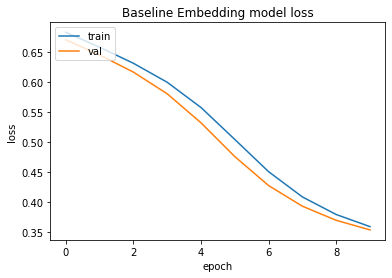

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Baseline Embedding model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [54]:
model_new.evaluate(padded_docs_test, y_test)

38/38 [==============================] - 2s 52ms/step - loss: 0.3499 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 22197.0000 - fn: 3045.0000 - accuracy: 0.8794 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7754


[0.3498610258102417,
 0.0,
 0.0,
 22197.0,
 3045.0,
 0.8793675899505615,
 0.0,
 0.0,
 0.7753960490226746]

Embedding using pretrained GloVe

In [55]:
#../input/glove6b100dtxt/glove.6B.100d.txt
embeddings_index_gloVe = {}
f = open(os.path.join('../input/glove6b100dtxt/glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_gloVe[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_gloVe))

#embeddings_index_gloVe


Found 400000 word vectors.


In [56]:
word_index = vect.word_index
print('Found %s unique tokens.' % len(word_index))

#word_index

Found 18663 unique tokens.


In [57]:


num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 100
hits = 0
misses = 0

# create a matrix of zeros, will be our embedding matrix used for our models embedding layer 
embedding_matrix_gloVe = np.zeros((num_words, embedding_dim))

# f
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index_gloVe.get(word)
    if embedding_vector is not None:
        # if word found add that words vector to the matrix
        embedding_matrix_gloVe[i] = embedding_vector
        hits += 1
    else:
        # assign a random vector if not found 
        embedding_matrix_gloVe[i] = np.random.randn(embedding_dim)
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

18664
Converted 17854 words (809 misses)


In [58]:
from keras.initializers import Constant


model_gloVe = keras.Sequential()
# Configuring the parameters
model_gloVe.add(layers.Embedding(input_dim = num_words,output_dim = 100,weights =[embedding_matrix_gloVe],input_length=175,trainable=False))
model_gloVe.add(layers.LSTM(128)) 
# Adding a dense output layer with sigmoid activation
model_gloVe.add(layers.Dropout(0.1))
model_gloVe.add(layers.Dense(units=21, activation='sigmoid'))
model_gloVe.add(Flatten())




model_gloVe.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 175, 100)          1866400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                2709      
_________________________________________________________________
flatten_1 (Flatten)          (None, 21)                0         
Total params: 1,986,357
Trainable params: 119,957
Non-trainable params: 1,866,400
_________________________________________________________________


In [59]:
tf.keras.optimizers.SGD(
    learning_rate=0.0001, momentum=0.7, name="sgd"
)


model_gloVe.compile(optimizer='sgd', loss="binary_crossentropy", metrics = METRICS)
history_gloVe = model_gloVe.fit(padded_docs_train,y_train, epochs = 10, verbose = 1, validation_split = 0.1)

Epoch 1/10
102/102 [==============================] - 22s 180ms/step - loss: 0.6820 - tp: 31.0000 - fp: 159.0000 - tn: 81932.0000 - fn: 11223.0000 - accuracy: 0.8781 - precision: 0.1632 - recall: 0.0028 - auc: 0.5551 - val_loss: 0.6709 - val_tp: 0.0000e+00 - val_fp: 5.0000 - val_tn: 6628.0000 - val_fn: 948.0000 - val_accuracy: 0.8743 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6206
Epoch 2/10
102/102 [==============================] - 18s 174ms/step - loss: 0.6594 - tp: 8.0000 - fp: 39.0000 - tn: 59855.0000 - fn: 8201.0000 - accuracy: 0.8790 - precision: 0.1702 - recall: 9.7454e-04 - auc: 0.6393 - val_loss: 0.6483 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 6633.0000 - val_fn: 948.0000 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6614
Epoch 3/10
102/102 [==============================] - 17s 167ms/step - loss: 0.6356 - tp: 5.0000 - fp: 20.0000 - tn: 59874.0000 - fn: 8204.0000 - accuracy: 0.8792 - precision: 0.200

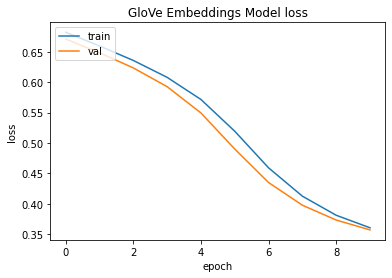

In [60]:
plt.plot(history_gloVe.history['loss'])
plt.plot(history_gloVe.history['val_loss'])
plt.title('GloVe Embeddings Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()

In [61]:
model_gloVe.evaluate(padded_docs_test, y_test)

38/38 [==============================] - 2s 57ms/step - loss: 0.3508 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 22197.0000 - fn: 3045.0000 - accuracy: 0.8794 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7724


[0.35084086656570435,
 0.0,
 0.0,
 22197.0,
 3045.0,
 0.8793675899505615,
 0.0,
 0.0,
 0.7723852396011353]

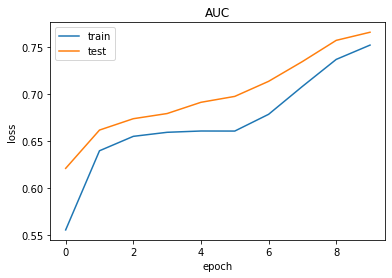

In [62]:
plt.plot(history_gloVe.history['auc'])
plt.plot(history_gloVe.history['val_auc'])
plt.title('AUC')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Word2Vec embeddings trained using Google Negative News text corpus

In [63]:
from time import time  # To time our operations
from collections import defaultdict  # For word frequency
from gensim.models.phrases import Phrases, Phraser

import multiprocessing

from gensim.models import Word2Vec

In [64]:
import gensim.models.keyedvectors as word2vec
word2vecDict = word2vec.KeyedVectors.load_word2vec_format("../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin", binary=True)
#embed_size = 100
embeddings_index_vec = dict()
for word in word2vecDict.index_to_key:
    embeddings_index_vec[word] = word2vecDict.word_vec(word)
print('Loaded %s word vectors.' % len(embeddings_index_vec))
            


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  


Loaded 3000000 word vectors.


In [65]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

hits = 0
misses = 0

embedding_dim = 300

# empty matrix of zeros
embedding_matrix_vec = np.zeros((num_words, embedding_dim))

# for each word tokenizied find that same word in pre-trained embedding dictionary
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index_vec.get(word)
    if embedding_vector is not None:
        # if word found add its vector representation to the embedding matrix
        embedding_matrix_vec[i] = embedding_vector
        hits += 1
    else:
        #  assign a random vector if word not found in embedding dictionary 
        embedding_matrix_vec[i] = np.random.randn(embedding_dim)
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

18664
Converted 15669 words (2994 misses)


In [66]:
embedding_matrix_vec

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.59959228,  2.08533519, -0.72142533, ..., -0.13356175,
        -0.08586876,  1.45860428],
       [ 0.08007812,  0.10498047,  0.04980469, ...,  0.00366211,
         0.04760742, -0.06884766],
       ...,
       [ 0.17285156, -0.08447266, -0.29101562, ...,  0.13574219,
        -0.16796875, -0.0100708 ],
       [ 0.20898438, -0.26367188, -0.06542969, ...,  0.29492188,
        -0.11816406, -0.25195312],
       [ 0.04003906, -0.08447266,  0.11816406, ..., -0.10546875,
        -0.14453125,  0.19433594]])

In [67]:
from keras.initializers import Constant

model_word2vec = keras.Sequential()
# Configuring the parameters
model_word2vec.add(layers.Embedding(vocab_size,300,weights=[embedding_matrix_vec],input_length=175,trainable=False))
model_word2vec.add(layers.LSTM(128)) 
model_word2vec.add(layers.Dropout(0.1))
model_word2vec.add(layers.Dense(units=21, activation='sigmoid'))
model_word2vec.add(Flatten())



model_word2vec.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 175, 300)          5599200   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 21)                2709      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21)                0         
Total params: 5,821,557
Trainable params: 222,357
Non-trainable params: 5,599,200
_________________________________________________________________


In [68]:
model_word2vec.compile(optimizer='sgd', loss="binary_crossentropy", metrics = METRICS)
history_word2vec = model_word2vec.fit(padded_docs_train,y_train,
                        epochs = 10,
                        verbose = 1, validation_split = 0.1)



Epoch 1/10
102/102 [==============================] - 27s 223ms/step - loss: 0.6842 - tp: 2807.0000 - fp: 4293.0000 - tn: 77798.0000 - fn: 8447.0000 - accuracy: 0.8635 - precision: 0.3954 - recall: 0.2494 - auc: 0.6148 - val_loss: 0.6752 - val_tp: 316.0000 - val_fp: 405.0000 - val_tn: 6228.0000 - val_fn: 632.0000 - val_accuracy: 0.8632 - val_precision: 0.4383 - val_recall: 0.3333 - val_auc: 0.7535
Epoch 2/10
102/102 [==============================] - 22s 212ms/step - loss: 0.6663 - tp: 2862.0000 - fp: 4293.0000 - tn: 55601.0000 - fn: 5347.0000 - accuracy: 0.8584 - precision: 0.4000 - recall: 0.3486 - auc: 0.7537 - val_loss: 0.6574 - val_tp: 316.0000 - val_fp: 406.0000 - val_tn: 6227.0000 - val_fn: 632.0000 - val_accuracy: 0.8631 - val_precision: 0.4377 - val_recall: 0.3333 - val_auc: 0.7579
Epoch 3/10
102/102 [==============================] - 21s 205ms/step - loss: 0.6478 - tp: 2808.0000 - fp: 4226.0000 - tn: 55668.0000 - fn: 5401.0000 - accuracy: 0.8586 - precision: 0.3992 - recall: 

In [69]:
model_word2vec.evaluate(padded_docs_test, y_test)

38/38 [==============================] - 3s 69ms/step - loss: 0.3761 - tp: 580.0000 - fp: 622.0000 - tn: 21575.0000 - fn: 2465.0000 - accuracy: 0.8777 - precision: 0.4825 - recall: 0.1905 - auc: 0.7884


[0.37611714005470276,
 580.0,
 622.0,
 21575.0,
 2465.0,
 0.877703845500946,
 0.4825291037559509,
 0.190476194024086,
 0.7883800268173218]

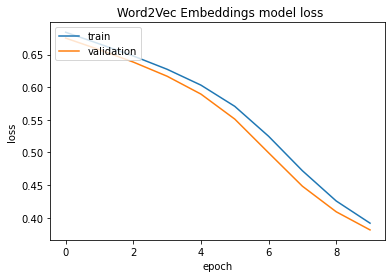

In [70]:
plt.plot(history_word2vec.history['loss'])
plt.plot(history_word2vec.history['val_loss'])
plt.title(' Word2Vec Embeddings model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [71]:
from tqdm import tqdm


embeddings_index_fast_text = dict()
f = open('../input/fasttext/wiki.simple.vec')

for line in tqdm(f):
    try:
        # split up line into an indexed array
        values = line.split()
        # first index is word
        word = values[0]
        # store the rest of the values in the array as a new array
        coefs = np.asarray(values[1:], dtype='float32')
        # ignore values without headers as word
        if len(coefs)==300:
            embeddings_index_fast_text[word] = coefs #300 dimension
        else:
            continue
    except:
        # split up line into an indexed array
        values = line.split()
        # first index is word or sometimes the second as well
        word = values[1]
        # store the rest of the values in the array as a new array
        coefs = np.asarray(values[2:], dtype='float32')
        print(values[:2])
        print(len(coefs))
        embeddings_index_fast_text[word] = coefs #300 dimension
f.close()
print('Loaded %s word vectors.' % len(embeddings_index_fast_text))

64701it [00:04, 13205.57it/s]

['the', 'united']
300


108404it [00:08, 14156.86it/s]

['the', 'national']
300


111052it [00:08, 13332.67it/s]

['of', 'thrust']
300
Loaded 110995 word vectors.


In [72]:
num_words = min(max_features, len(word_index)) + 1
print(num_words)

hits = 0
misses = 0
embedding_dim = 300


embedding_matrix_fasttext = np.zeros((num_words, embedding_dim))


for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index_fast_text.get(word)
    if embedding_vector is not None:
   
        embedding_matrix_fasttext[i] = embedding_vector
        hits += 1
    else:
       
        embedding_matrix_fasttext[i] = np.random.randn(embedding_dim)
        misses += 1 
print("Converted %d words (%d misses)" % (hits, misses))

18664
Converted 15780 words (2883 misses)


In [73]:
model_fast_text = keras.Sequential()
# Configuring the parameters embeddings_initializer=Constant(embedding_matrix)
model_fast_text.add(layers.Embedding(input_dim = vocab_size, output_dim = 300,weights = [embedding_matrix_fasttext],input_length=175,trainable=False))
model_fast_text.add(layers.LSTM(128)) 
model_fast_text.add(layers.Dropout(0.1))
model_fast_text.add(layers.Dense(units=21, activation='sigmoid'))
model_fast_text.add(Flatten())


model_fast_text.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 175, 300)          5599200   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               219648    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 21)                2709      
_________________________________________________________________
flatten_3 (Flatten)          (None, 21)                0         
Total params: 5,821,557
Trainable params: 222,357
Non-trainable params: 5,599,200
_________________________________________________________________


In [74]:
model_fast_text.compile(optimizer='sgd', loss="binary_crossentropy", metrics = METRICS)
history_fast_text = model_fast_text.fit(padded_docs_train,y_train,
                        epochs = 10,
                        verbose = 1, validation_split = 0.1)

Epoch 1/10
102/102 [==============================] - 26s 221ms/step - loss: 0.6825 - tp: 686.0000 - fp: 1004.0000 - tn: 81087.0000 - fn: 10568.0000 - accuracy: 0.8760 - precision: 0.4059 - recall: 0.0610 - auc: 0.5919 - val_loss: 0.6718 - val_tp: 2.0000 - val_fp: 9.0000 - val_tn: 6624.0000 - val_fn: 946.0000 - val_accuracy: 0.8740 - val_precision: 0.1818 - val_recall: 0.0021 - val_auc: 0.6358
Epoch 2/10
102/102 [==============================] - 22s 213ms/step - loss: 0.6611 - tp: 73.0000 - fp: 184.0000 - tn: 59710.0000 - fn: 8136.0000 - accuracy: 0.8778 - precision: 0.2840 - recall: 0.0089 - auc: 0.6233 - val_loss: 0.6502 - val_tp: 0.0000e+00 - val_fp: 3.0000 - val_tn: 6630.0000 - val_fn: 948.0000 - val_accuracy: 0.8746 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6498
Epoch 3/10
102/102 [==============================] - 22s 213ms/step - loss: 0.6385 - tp: 49.0000 - fp: 136.0000 - tn: 59758.0000 - fn: 8160.0000 - accuracy: 0.8782 - precision: 0.2649 - recall: 0.

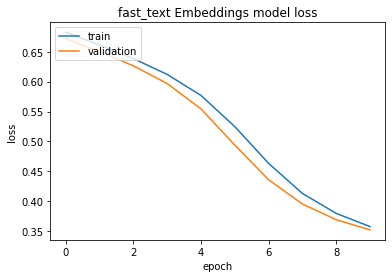

In [75]:
plt.plot(history_fast_text.history['loss'])
plt.plot(history_fast_text.history['val_loss'])
plt.title('fast_text Embeddings model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [76]:
model_fast_text.evaluate(padded_docs_test, y_test)

38/38 [==============================] - 3s 67ms/step - loss: 0.3474 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 22197.0000 - fn: 3045.0000 - accuracy: 0.8794 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7690


[0.34741678833961487,
 0.0,
 0.0,
 22197.0,
 3045.0,
 0.8793675899505615,
 0.0,
 0.0,
 0.7689993977546692]

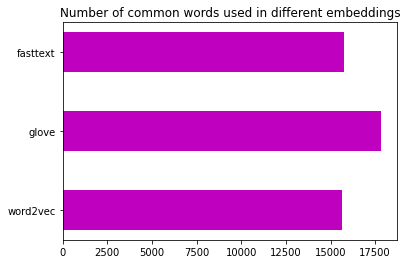

In [77]:
wordCount = {'word2vec':15645,'glove':17850,'fasttext':15755}

ind = np.arange(0,3,1)  # the x locations for the groups
width = 0.35       # the width of the bars

plt.title('Number of common words used in different embeddings')
embNames = list(wordCount.keys())
embVals = list(wordCount.values())
plt.barh(ind,embVals,align='center', height=0.5, color='m',tick_label=embNames)
plt.show()